<a href="https://colab.research.google.com/github/Neumi/colab-ml-reverse-captcha/blob/master/captch_ml_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install claptcha
!pip3 install image_slicer

    100% |████████████████████████████████| 92kB 6.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/9b/d5/17/dd822b462a190ec86ad9fd43b455627a2265bb2dfa58af3841
Successfully built image-slicer


In [2]:
!curl -s https://course.fast.ai/setup/colab | bash
!pip install git+https://github.com/fastai/fastai.git
!curl -LJO https://raw.githubusercontent.com/lepture/captcha/master/captcha/data/DroidSansMono.ttf

Updating fastai...
Done.
  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-rzy_w3_u
  Stored in directory: /tmp/pip-ephem-wheel-cache-24lp6h9j/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
  Found existing installation: fastai 1.0.51
    Uninstalling fastai-1.0.51:
      Successfully uninstalled fastai-1.0.51
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  114k  100  114k    0     0   571k      0 --:--:-- --:--:-- --:--:--  571k


In [0]:
#!/bin/bash
!mkdir numbers
!mkdir numbers/0
!mkdir numbers/1
!mkdir numbers/2
!mkdir numbers/3
!mkdir numbers/4
!mkdir numbers/5
!mkdir numbers/6
!mkdir numbers/7
!mkdir numbers/8
!mkdir numbers/9
!mkdir captchas
!mkdir images

In [4]:
!rm captchas/*

rm: cannot remove 'captchas/*': No such file or directory


In [5]:
from claptcha import Claptcha
from random import choice
from string import ascii_uppercase
from string import digits
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import os
import sys


print("done!")

done!


In [0]:
captchasDir = 'captchas/'
imgXorigin = 200
imgYorigin = 80
offset = 15
imgX = imgXorigin - (2 * offset)
imgY = imgYorigin
captchaLength = 5

In [0]:

def generateRandString(length):
    # return ''.join(choice(ascii_uppercase) for i in range(length))
    return ''.join(choice(digits) for i in range(length))


def generateCaptcha(input):
    c = Claptcha(str(input), "DroidSansMono.ttf")
    text, image = c.image
    text, bytes = c.bytes
    text, file = c.write('captchas/' + str(input) + '.png')
    return


def generateCaptchaFamily(amount, length):
    i = 0
    print('generating ' + str(amount) + ' test files ...')
    while i < amount:
        i += 1
        print(str(i/amount*100) + ' % complete' , end='')
        print(str, end='\r') 
        sys.stdout.flush()
        randString = generateRandString(length)
        generateCaptcha(randString)


def generateTestFiles():
    i = 0
    amountFiles = 100
    while i < amountFiles:
        i += 1
        randString = generateRandString(captchaLength)
        try:
            generateCaptcha(randString)
            print(str(i) + '/' + str(amountFiles) + ' files generated')
            
        except:
            print('error while generating captcha')


def crop(image_path, coords, img_name):
    image_obj = Image.open(image_path)
    cropped_image = image_obj.crop(coords)
    cropped_image.save(img_name)
    # cropped_image.show()


def extracktNumbersFromImage(image, number):
    digits = [int(d) for d in str(number)]
    crop(image, (offset, 0, imgXorigin - offset, imgYorigin), 'test_img.png')

    for (key, digit) in enumerate(digits):
        startX = (imgX / captchaLength) * key
        cutoffX = (imgX / captchaLength) * (key + 1)
        savePath = './numbers/' + str(digit) + '/'
        savePath = './images/'
        path, dirs, files = next(os.walk(savePath))
        file_count = len(files)
        crop('test_img.png', (startX, 0, cutoffX, imgY), savePath + '/' + str(digit) + '_' + str(file_count + 10000) + '.png')


def generateNumbers():
    path, dirs, files = next(os.walk(captchasDir))
    for file in files:
        numberString = str(file.title()[:captchaLength])
        filePath = str(captchasDir + file.format())

        if not file.startswith('.'):
            print(numberString)
            print(filePath)
            
            extracktNumbersFromImage(filePath, numberString)

                       

def getStarted():
    generateCaptchaFamily(10000, captchaLength)
    generateNumbers()

# getStarted()

In [56]:
# !rm ./images/*


rm: cannot remove './images/models': Is a directory


In [13]:
! ls ./images/ | head -10

0_10008.png
0_10013.png
0_10029.png
0_10032.png


In [0]:
from fastai.vision import *
from fastai.imports import *
from sklearn.utils import shuffle
import imageio

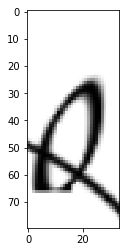

In [14]:
plt.imshow(imageio.imread("./images/0_10008.png"))
plt.show()

In [0]:
fnames = get_image_files("./images")
pat = r'/([^/]+)_\d+.png$'
tfms = get_transforms(do_flip=False)

In [17]:
data = ImageDataBunch.from_name_re("./images", fnames, pat, ds_tfms=tfms)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (37912 items)
x: ImageList
Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34)
y: CategoryList
7,8,3,2,4
Path: images;

Valid: LabelList (9478 items)
x: ImageList
Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34),Image (3, 80, 34)
y: CategoryList
0,4,9,4,2
Path: images;

Test: None

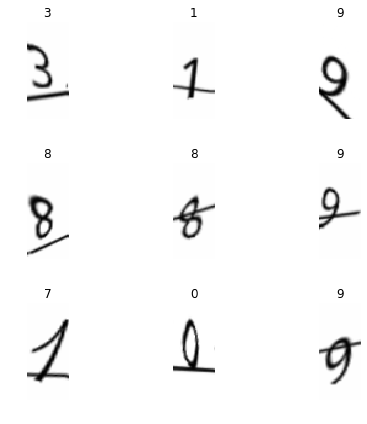

In [18]:
data.show_batch(rows=3, figsize=(7,6))

In [19]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [20]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:01, 24087766.57it/s]


In [21]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.378766,0.241826,0.081768,00:59


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


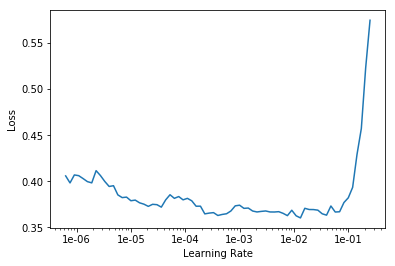

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,  1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.578645,0.104202,0.011500,01:01
1,0.035897,0.014941,0.002005,00:59


In [24]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,  1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.035741,0.012503,0.001583,01:02
1,0.035679,0.009455,0.001266,01:01
2,0.026721,0.009420,0.001688,01:03


In [0]:
interp=ClassificationInterpretation.from_learner(learn)

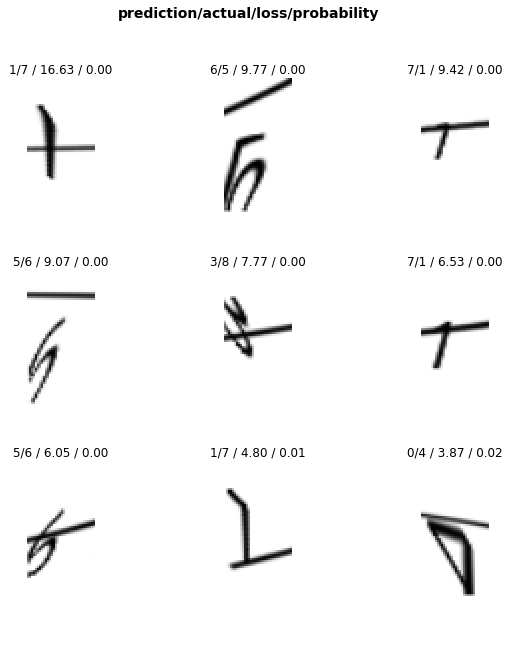

In [29]:
interp.plot_top_losses(9, figsize=(10, 10))

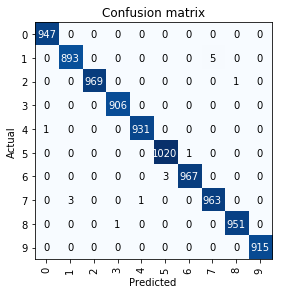

In [27]:
interp.plot_confusion_matrix()

In [34]:
### test captchas
#!rm captchas/*
#!mkdir captchas/fragments
#!rm captchas/fragments/*


def generateRandString(length):
    return ''.join(choice(digits) for i in range(length))


def generateCaptcha(input):
    c = Claptcha(str(input), "DroidSansMono.ttf")
    text, image = c.image
    text, bytes = c.bytes
    text, file = c.write('captchas/test.png')
    print('generated: ' + str(input))


def extracktFragmentsFromImage(image):
    crop(image, (offset, 0, imgXorigin - offset, imgYorigin), 'test_img.png')

    # for (key, digit) in enumerate(digits):
    for element in range(5):
        startX = (imgX / captchaLength) * element
        cutoffX = (imgX / captchaLength) * (element + 1)
        savePath = './captchas/' + str(element) + '/'
        savePath = './captchas/fragments/'
        path, dirs, files = next(os.walk(savePath))
        file_count = len(files)
        crop('test_img.png', (startX, 0, cutoffX, imgY), savePath + '/' + 
             str(element) + '_' + str(file_count + 10000) + '.png')


generateCaptcha(37512)
extracktFragmentsFromImage('captchas/test.png')
# randString = generateRandString(captchaLength)
# generateCaptcha(randString)





rm: cannot remove 'captchas/fragments': Is a directory
mkdir: cannot create directory ‘captchas/fragments’: File exists
rm: cannot remove 'captchas/fragments/*': No such file or directory
generated: 37512


AttributeError: ignored